<a href="https://colab.research.google.com/github/reneSalmon/Google_TensorFlow_Certificate/blob/master/TensorFlow_Exam_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 1: TF.Basics


## How to build a model with handwritten numbers?

1. Load a prebuild dataset
2. Build neural network that classifies images
3. Train neural network
4. Evaluat accuracy of model

In [ ]:
#Setup
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


### How to load a dataset?

In [ ]:
#load data
minst = tf.keras.datasets.mnist #load dataset of 70.000 handwriting digits for image classification
(x_train, y_train), (x_test, y_test) = minst.load_data() #split dataset x = images, y = image labels
x_train, x_test = x_train / 255.0, x_test / 255.0 #normalize dataset

11501568/11490434 [==============================] - 0s 0us/step


### How to view image data?

In [ ]:
#view data
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(y_train[0])
print(x_train[0])

### How to build an ML models?

In [ ]:
# 2 Build machine learning model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

### How to make predictions?

In [ ]:
# 3 For each example, the model returns a vector of logits or log-odds scores, one for each class.
predictions = model(x_train[:1]).numpy()
predictions

### How to create probabilities for each class?

In [ ]:
# 4 The tf.nn.softmax function converts these logits to probabilities for each class
tf.nn.softmax(predictions).numpy()

### How to define a loss function?

In [ ]:
# 5 Define a loss function for training using losses.SparseCategoricalCrossentropy,
# which takes a vector of logits and a True index and returns a scalar loss for each example.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
# 6 This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.
# This untrained model gives probabilities close to random (1/10 for each class), 
# so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.
loss_fn(y_train[:1], predictions).numpy()

### How to compile a model?

In [ ]:
# 7 Configure and compile the model 
model.compile(optimizer="adam",
              loss=loss_fn,
              metrics=["accuracy"])

### How to train a model?


In [ ]:
# 1 Adjust model parameters and minimize loss
model.fit(x_train, y_train, epochs=5)

### How to check the model performance?

In [ ]:
# 2 Check the model performance 
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Image classifier accuracy is {accuracy} on this dataset")

In [ ]:
# 3 Return probability of the matching for a specific test
probability_model = tf.keras.Sequential([
    model, 
    tf.keras.layers.Softmax()
])

In [ ]:
results = probability_model(x_test[:5])
results

In [ ]:
rounded_results = tf.math.round(results)
rounded_results

In [ ]:
#Suggestion for results = [7, 2, 1, 0, 4]
# How to show the results in numbers automatically?
# How to compare the results?
y_test[:5]

## How to build a simple NN with TensorFlow?

In [ ]:
from tensorflow import keras 
import numpy as np

In [ ]:
# 1 Define and compile neural network
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])]) # 1 layer / 1 neuron

In [ ]:
# 2 Compile NN with 2 functions: Loss and optimizer
model.compile(optimizer="sgd", loss="mean_squared_error")

In [ ]:
# 3 Providing data
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

In [ ]:
# 4 Training NN
model.fit(xs, ys, epochs=500)
print(model.predict([10.0]))

## How to predict a house price with ML?

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

So, imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k etc.

How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k etc.

Hint: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands' etc.

In [ ]:
# GRADED FUNCTION: house_model
def house_model(y_new):
    x = np.array([1.0, 2.0, 3.0, 4.0, 5.0 , 6.0], dtype=float)
    y = np.array([100.0, 150.0, 200.0, 250.0, 300.0, 350.0], dtype=float)
    model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
    model.compile(optimizer="SGD", loss="mse")
    model.fit(x,y, epochs=500)
    return model.predict(y_new)[0]

In [ ]:
prediction = house_model([7])
print(prediction)

## How to build, compile and train a sequential model with multiple layers?

In [ ]:
#Load fashion dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

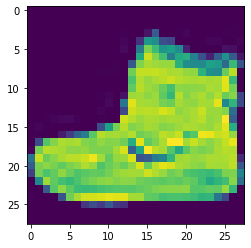

In [ ]:
#view data
plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

In [ ]:
#Normalize data 
training_images = training_images/255
test_images = test_images/255

In [ ]:
from matplotlib.cbook import flatten
#Design model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128, activation="relu"),
                                   tf.keras.layers.Dense(10, activation="softmax")])

In [ ]:
model.compile(optimizer="adam",
              loss= "sparse_categorical_crossentropy",
              metrics = ["accuracy"])
model.fit(training_images, training_labels, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4910 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3689 - accuracy: 0.8680
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3328 - accuracy: 0.8801
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3101 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2922 - accuracy: 0.8916


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8745


[0.3497617840766907, 0.8744999766349792]

In [ ]:
classifications = model.predict(test_images)
print(tf.math.round(classifications[:5]))

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [ ]:
# Prediction [9,2,1,1,6]
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [ ]:
np.argmax(classifications[0])

9

In [ ]:
#Outmate classification validation for a wanted number of examples 
def output_checker(number_of_examples):
  right = []
  wrong = []
  for i in range(number_of_examples):
    if np.argmax(classifications[i]) == test_labels[i]:
      #print(f'{i} prediction is right')
      right.append(i)
      

    else:
      #print(f'{i} prediction is wrong')
      wrong.append(i)

  #print(right)
  print(f'{len(wrong)} of {number_of_examples} are wrong classified \n List of wrong classified pictures: \n {wrong}')

In [ ]:
output_checker(1000)
output_checker

123 of 1000 are wrong classified 
 List of wrong classified pictures: 
 [17, 25, 27, 40, 42, 48, 49, 50, 51, 66, 68, 89, 98, 103, 107, 127, 147, 150, 151, 153, 170, 192, 222, 227, 239, 241, 244, 247, 255, 271, 282, 313, 314, 316, 324, 332, 344, 359, 361, 378, 381, 382, 389, 396, 404, 409, 410, 413, 441, 444, 454, 457, 460, 474, 476, 480, 490, 491, 499, 506, 511, 512, 526, 529, 546, 548, 562, 563, 565, 569, 572, 578, 586, 589, 595, 608, 616, 635, 637, 639, 661, 663, 664, 669, 670, 685, 688, 697, 701, 702, 711, 722, 725, 732, 753, 760, 761, 787, 800, 801, 830, 851, 881, 890, 902, 905, 926, 930, 935, 937, 939, 948, 956, 963, 965, 966, 967, 976, 977, 979, 985, 993, 994]


<function __main__.output_checker(number_of_examples)>

## What happens if you incrase the amount of neurons?

In [ ]:
#Now test with 512 neurons
#What different results do you get for loss, training time etc? 
#Why do you think that's the case?

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(512, activation="relu"),
                          tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classification = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4740 - accuracy: 0.8316
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3585 - accuracy: 0.8688
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3214 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2976 - accuracy: 0.8902
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8752


In [ ]:
print(tf.math.round(classifications[0],0))
print(test_labels[0])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)
9


In [ ]:
#Hypothesis: Double the amount of neurons will increase accuracy
#But processing will take more time 

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(1024, activation="relu"),
                          tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classification = model.predict(test_images)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4680 - accuracy: 0.8316
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3558 - accuracy: 0.8686
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3214 - accuracy: 0.8829
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2955 - accuracy: 0.8909
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.8773


In [ ]:
# Result: Training takes longer and accuracy is increased from 0.8656 to 0.8757
print(tf.math.round(classifications[0],0))
print(test_labels[0])

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], shape=(10,), dtype=float32)
9


## What would happen if you remove the Flatten layer?

In [ ]:
#What would happen if you remove the Flatten() layer. Why do you think that's the case?

# 1 With Flatten we create of out 28x28 matrix an array of 784X1
# 2 RoT = First Layer should be in same shape as input data 
# 3 Ergo: Will will get an error because wrong shape of data. 

## What does the final output layer do?

In [ ]:
#Consider the final (output) layers. Why are there 10 of them? 
#What would happen if you had a different amount than 10? For example, try training the network with 5.

# 1 There are 10 neurons because every neuron represents a class
# 2 Error. The output layer has to represent the same amount of neurons as the classes in the dataset

## What is the effect of additional layers?

In [ ]:
#Consider the effects of additional layers in the network. 
#What will happen if you add another layer between the one with 512 and the final layer with 10.

# The computational time will increase and in general the accuracy of the model, too.
# For small data there will not be a significatn difference, but for bigger datasets extra layers are often mandatory.

## What is the impact of more or less epochs?

In [ ]:
#Consider the impact of training for more or less epochs. Why do you think that would be the case?

# 1 In general more epochs will increase the accuracy
# 2 In general less epochs will decrease the accuracy
# 3 In some point the loss will stop decreaing and start increase again => sign for overfitting


## How and why do you normalize data? 

In [ ]:
#Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. 
#What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results?

# Test with normalized data
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2020
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0814
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0523
Epoch 4/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0372
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0760
[1.2117712e-08 3.9707051e-09 1.0017967e-07 6.2315405e-05 5.9074127e-13 4.6154049e-08 2.1332010e-15 9.9993706e-01 1.0906300e-08 4.9329259e-07]
7


In [ ]:
# Test without normalized data
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 2.6463
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3696
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3135
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2772
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2926
[2.1830795e-27 2.6469789e-23 3.6237204e-17 5.2373847e-16 3.6260253e-27 1.8939696e-24 0.0000000e+00 1.0000000e+00 9.3582606e-30 1.7994008e-19]
7


In [ ]:
# Results
# 1 Loss is without normalization higher
# 2 Speed of procesing data is higher ... interesting :-D

## How and why do you implement callbacks?

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("acc") > 0.9):
      print("\nReached 85% of accuracy so cancelling training!")
      self.model.stop_training = True
  
callbacks = myCallback()

#Preprocess dataset
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images/255
test_images = test_images/255

#Create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="acc")
model.fit(training_images, training_labels, epochs=8, callbacks=[callbacks])

Epoch 1/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4739 - acc: 0.8305
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3600 - acc: 0.8678
Epoch 3/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3223 - acc: 0.8816
Epoch 4/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2971 - acc: 0.8899
Epoch 5/8
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2809 - acc: 0.8958
Epoch 6/8
1865/1875 [============================>.] - ETA: 0s - loss: 0.2654 - acc: 0.9010
Reached 85% of accuracy so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2654 - acc: 0.9010


In [ ]:
#Evaluate performance
model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)
print(tf.math.round(predictions[:5]))
print(test_labels[:5])

313/313 [==============================] - 1s 2ms/step - loss: 0.3289 - acc: 0.8864
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)
[9 2 1 1 6]


In [ ]:
evaluation = model.evaluate(test_images, test_labels)
print("test_loss, test_acc:", evaluation)

313/313 [==============================] - 1s 3ms/step - loss: 0.3289 - acc: 0.8864
test_loss, test_acc: [0.32890239357948303, 0.8863999843597412]


In [ ]:
np.argmax(predictions[0])

9

In [ ]:
#Outmate classification validation for a wanted number of examples 

def output_checker(number_of_examples):
  right = []
  wrong = []
  for i in range(number_of_examples):
    if np.argmax(predictions[i]) == test_labels[i]:
      #print(f'{i} prediction is right')
      right.append(i)
      

    else:
      #print(f'{i} prediction is wrong')
      wrong.append(i)

  #print(right)
  print(f'{len(wrong)} of {number_of_examples} are wrong classified \n List of wrong classified pictures: \n {wrong}')

In [ ]:
output_checker(1000)

108 of 1000 are wrong classified 
 List of wrong classified pictures: 
 [12, 17, 23, 25, 40, 42, 49, 51, 66, 68, 89, 98, 103, 107, 127, 135, 136, 141, 147, 150, 151, 153, 155, 163, 172, 192, 227, 239, 241, 244, 249, 255, 282, 316, 324, 325, 332, 344, 359, 361, 367, 368, 374, 378, 381, 382, 396, 404, 406, 413, 441, 444, 454, 457, 460, 474, 490, 491, 499, 529, 548, 562, 563, 565, 569, 572, 577, 586, 595, 635, 639, 663, 664, 669, 670, 671, 681, 688, 689, 711, 722, 725, 732, 753, 760, 761, 787, 800, 801, 830, 851, 881, 887, 890, 902, 905, 909, 921, 930, 935, 963, 965, 971, 976, 977, 979, 985, 994]


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## How to build a model with binary classification?

In [ ]:
  # We need a dataset for two classes e.g. images of humans and images of horses
  # We have to specifiy our outputlayer for a binary classification
  # We have only 1 output neuron
  # We have to use the sigmoid activation function
  # It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
  tf.keras.layers.Dense(1, activation='sigmoid')

## How to prevent overfitting?

In [ ]:
# Hold-out: Split dataset (80/20)
# Cross-validation data: (Create k groups for testing)
# Train with more data
# Data augmendation: Increase the variety of data by e.g. rotating, flipping, rescaling, shifting
# Feature selection: Reduce amount of features
# L1/L2 regularization: Reduce weights of features to zero (L1) or almost to zero (L2) 
# Dropout: A form of regularization, which ignores a subset of neurons in layers 
# Callbacks: We stop and save the model training at a treshold we define  
# Reduce complexity of model by decrease number of neurons and layers


## How to use pretrained models? (transfer learning)

## How to extract features from a pretrained model?

## How to ensure that input to a model are in the correct shape?

## How to ensure that the test data match to the imput shape of a neural network?

## How can you ensure that the output data match with the input shape for the test data?

## How and why do you do batch loading of data?

## How do you use data from different sources?

## How do you use datasets in different formats? (e.g. json and csv)

## How do you use datasets from tf.data.datasets?

# Day 2: TF.ComputerVision (CV)

## How do you define CNN with Conv2D and pooling layers?

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## How to build and train models to process real-world image datasets?

### Import dataset

In [ ]:
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1onaG42NZft3wCE1WH0GDEbUhu75fedP5
To: /content/horse-or-human.zip
100% 150M/150M [00:03<00:00, 47.0MB/s]


In [ ]:
import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

### Create directories for data labeling with ImageDataGenerator

In [ ]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

### Explore data

In [ ]:
# View images in directories
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse47-6.png', 'horse34-2.png', 'horse16-0.png', 'horse35-3.png', 'horse07-9.png', 'horse50-8.png', 'horse26-7.png', 'horse11-7.png', 'horse18-4.png', 'horse22-0.png']
['human11-00.png', 'human06-01.png', 'human15-20.png', 'human04-09.png', 'human01-30.png', 'human15-13.png', 'human14-07.png', 'human11-12.png', 'human06-06.png', 'human11-01.png']


In [ ]:
#Count total number of images
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


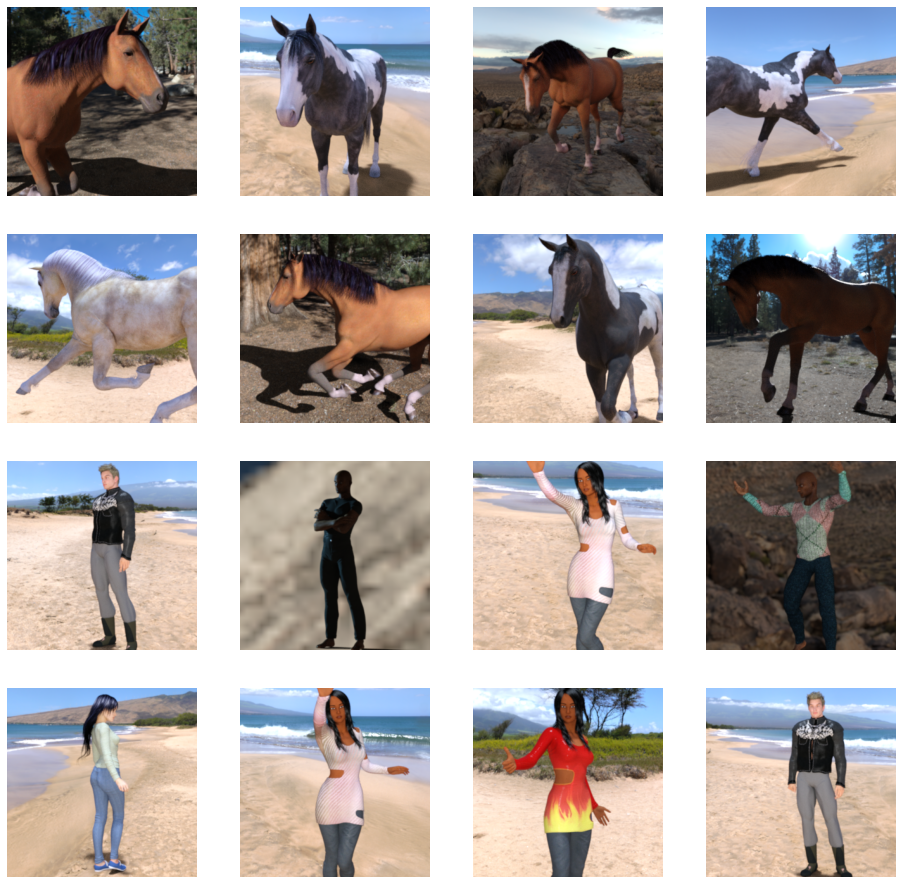

In [ ]:
#Look at pictures
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Build model

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Preprocess data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


### Train model

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 86s 10s/step - loss: 0.8939 - accuracy: 0.4983
Epoch 2/15
8/8 [==============================] - 79s 10s/step - loss: 0.8420 - accuracy: 0.6385
Epoch 3/15
8/8 [==============================] - 81s 10s/step - loss: 0.8014 - accuracy: 0.7052
Epoch 4/15
8/8 [==============================] - 91s 11s/step - loss: 0.4291 - accuracy: 0.8613
Epoch 5/15
8/8 [==============================] - 93s 11s/step - loss: 0.4795 - accuracy: 0.8287
Epoch 6/15
8/8 [==============================] - 87s 12s/step - loss: 0.1754 - accuracy: 0.9321
Epoch 7/15
8/8 [==============================] - 83s 10s/step - loss: 0.3798 - accuracy: 0.8699
Epoch 8/15
8/8 [==============================] - 81s 10s/step - loss: 0.3950 - accuracy: 0.9210
Epoch 9/15
8/8 [==============================] - 82s 12s/step - loss: 0.2126 - accuracy: 0.9255
Epoch 10/15
8/8 [==============================] - 85s 10s/step - loss: 0.1061 - accuracy: 0.9588
Epoch 11/15
8/8 [============

### Make predictions

In [ ]:
# Upload image from your file system, to test if it works
import numpy as np
from keras.preprocessing import image
import os

images = os.listdir("/tmp/images")

print(images)

for i in images:
 print()
 # predicting images
 path = '/tmp/images/' + i
 img = image.load_img(path, target_size=(300, 300))
 x = image.img_to_array(img)
 x = np.expand_dims(x, axis=0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size=10)
 print(classes[0])
 if classes[0]>0.5:
   print(i + " is a human")
 else:
   print(i + " is a horse")

['download.jpg', 'download-1.jpg', 'download-2.jpg', 'images-1.jpg', 'images-2.jpg', 'images.jpg']

[0.]
download.jpg is a horse

[0.]
download-1.jpg is a horse

[0.]
download-2.jpg is a horse

[0.]
images-1.jpg is a horse

[0.]
images-2.jpg is a horse

[0.]
images.jpg is a horse


### How to visualize the features that Convnet has learned?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


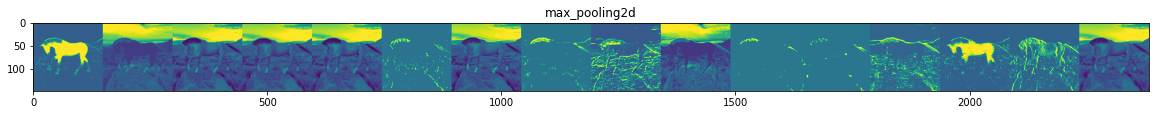

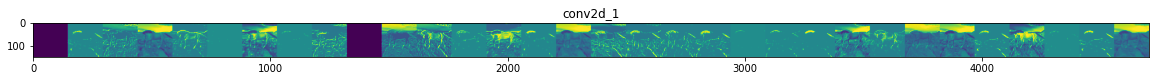

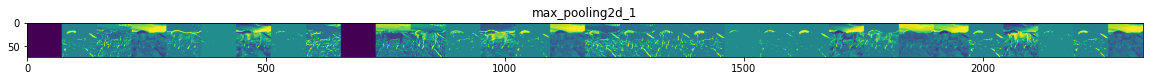

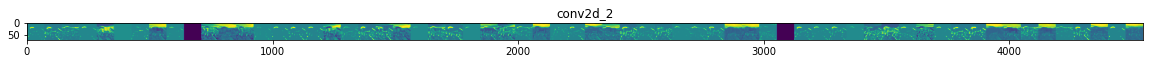

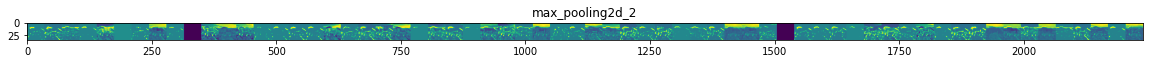

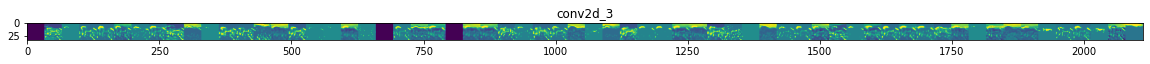

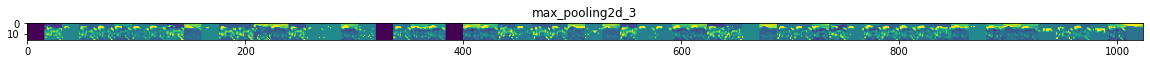

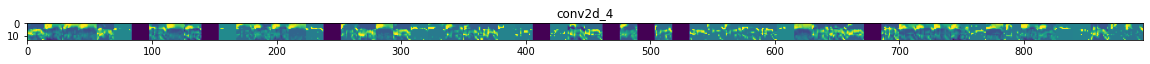

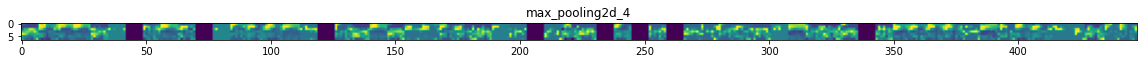

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.

These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

## How to use CNN to improve neural networks?

### What difference does it make if we use of 16, 32 or 64 convolutions? 

In [ ]:
# Editing convolutions
# What will the impact be if we change them from 32, to 16 or 64?
# The impact with 16 filters will be computational less expensive (less training-time) but less acurracy
# The impact with 64 filters will be computational more expensive (more training-time) but higher accuracy

#Test: Convolutions 32
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1491 - accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0503 - accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0211 - accuracy: 0.9932
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0139 - accuracy: 0.9956
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0099 - accuracy: 0.9968
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0059 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0054 - accuracy: 0.9982
Epoch 10/10
313/313 [==============================] - 4s 

In [ ]:
#Test: Convolutions 16
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1636 - accuracy: 0.9520
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0586 - accuracy: 0.9819
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0394 - accuracy: 0.9874
Epoch 4/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0272 - accuracy: 0.9916
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0096 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0057 - accuracy: 0.9980
Epoch 10/10
313/313 [==============================] - 2s 

In [ ]:
#Test: Convolutions 64
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1364 - accuracy: 0.9589
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0464 - accuracy: 0.9858
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0285 - accuracy: 0.9912
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0131 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0088 - accuracy: 0.9969
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 8/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0053 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 10/10
313/313 [==============================] - 3s 

### What happens if we remove the CNN?

In [ ]:
#Test: DNN without Convolutions (Neural Filter)
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2549 - accuracy: 0.9268
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1095 - accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0762 - accuracy: 0.9766
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0574 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0444 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0285 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0224 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0189 - accuracy: 0.9944
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0

In [ ]:
# Results
# 1 Training-time decreases significant
# 2 Accuracy decreases minimal

### What impact will it have to add more convolution layers?

In [ ]:
#Test: Add a second CNN layer pair
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1277 - accuracy: 0.9607
Epoch 2/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0400 - accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0268 - accuracy: 0.9918
Epoch 4/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0189 - accuracy: 0.9942
Epoch 5/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0123 - accuracy: 0.9958
Epoch 7/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0075 - accuracy: 0.9976
Epoch 9/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0066 - accuracy: 0.9981
Epoch 10/10
313/313 [==============================] - 5s 

### How to implement callbacks to prevent overfitting?

In [ ]:
#Test: Add callbacks to prevent CNN from overfitting
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("acc") > 0.98):
      print("\nReached 98% of accuracy so cancelling training!")
      self.model.stop_training = True
  
callbacks = myCallback()

print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
  tf.keras.layers.MaxPool2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

2.8.2
Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.1292 - acc: 0.9604
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0417 - acc: 0.9868
Reached 98% of accuracy so cancelling training!
313/313 [==============================] - 3s 10ms/step - loss: 0.0362 - acc: 0.9878
0.9878000020980835


## How to use real-world images in different shapes and sizes?

## How to use image augmentation to prevent overfitting?

### Create and train a model

In [ ]:
!gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
  
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9
To: /content/cats_and_dogs_filtered.zip
100% 68.6M/68.6M [00:04<00:00, 17.0MB/s]


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 - 128s - loss: 0.6812 - accuracy: 0.5555 - val_loss: 0.6528 - val_accuracy: 0.6390 - 128s/epoch - 1s/step
Epoch 2/100
100/100 - 118s - loss: 0.6424 - accuracy: 0.6270 - val_loss: 0.6271 - val_accuracy: 0.6610 - 118s/epoch - 1s/step
Epoch 3/100
100/100 - 112s - loss: 0.5993 - accuracy: 0.6760 - val_loss: 0.5924 - val_accuracy: 0.6910 - 112s/epoch - 1s/step
Epoch 4/100
100/100 - 111s - loss: 0.5623 - accuracy: 0.6995 - val_loss: 0.5786 - val_accuracy: 0.6980 - 111s/epoch - 1s/step
Epoch 5/100
100/100 - 108s - loss: 0.5345 - accuracy: 0.7275 - val_loss: 0.5709 - val_accuracy: 0.6910 - 108s/epoch - 1s/step
Epoch 6/100
100/100 - 107s - loss: 0.5112 - accuracy: 0.7500 - val_loss: 0.5577 - val_accuracy: 0.7010 - 107s/epoch - 1s/step
Epoch 7/100


In [ ]:
# Evaluate results
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Run same CNN with DataAugmentation

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In [ ]:
# !gdown --id 1RL0T7Rg4XqQNRCkjfnLo4goOJQ7XZro9

  
# import os
# import zipfile
# import tensorflow as tf
# from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
# zip_ref.extractall("tmp/")
# zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

In [ ]:
#Evaluate results

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## How to use ImageDataGenerator?

In [ ]:
# data preprocessing

# ImageDataGenerator 
# data generators will read pictures in our source folders
# convert them to float32 tensors,
# and feed them (with their labels) to our network.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:

# ImageDataGenerator with cross-validation 

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

## How to use ImageDataGenerator to label images based on the directory structure?

In [ ]:
# Download data
!gdown --id 1onaG42NZft3wCE1WH0GDEbUhu75fedP5 # dataset
!gdown --id 1LYeusSEIiZQpwN-mthh5nKdA75VsKG1U # cross-validation data

In [ ]:
# Import data

import os
import zipfile

local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [ ]:
# Define directories

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [ ]:
#Lets see what the filenames look like

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

print(train_horse_names[:10])
print(train_human_names[:10])

In [ ]:
# Data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

In [ ]:
# Training
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)


#Day 3: TF.Natrual Language Processing (NLP)

#Day 4: TF.Time Series Forcasting